In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime

# Set the start date to January 1st, 2010
start = datetime(2010, 1, 1)

# Set the end date to December 31st, 2015
end = datetime(2024, 12, 31)

# Define the stock ticker symbol45
stock = "GOOG" # This line is added to define the 'stock' variable

# Fetch stock data for Google (GOOG) using the updated date range
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-04,15.536651,15.605068,15.474429,15.541608,78541293
2010-01-05,15.468233,15.563671,15.407499,15.547310,120638494
2010-01-06,15.078297,15.514587,15.031197,15.514587,159744526
2010-01-07,14.727283,15.121432,14.691338,15.106558,257533695
2010-01-08,14.923613,14.954103,14.603584,14.675224,189680313


In [ ]:
google_data.shape

(3773, 5)

In [ ]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,61.121463,61.729107,60.492631,61.090278,5.314884e+07
std,47.169446,47.675303,46.661307,47.137310,4.878143e+07
min,10.809839,10.963781,10.749354,10.865368,1.584340e+05
25%,22.473173,22.631327,22.319728,22.490276,2.410400e+07
50%,46.248943,46.473880,45.954587,46.257904,3.377046e+07
75%,93.726067,94.736783,92.110227,93.457345,7.060400e+07
max,197.934509,202.649131,196.466172,198.304075,5.952147e+08


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   3773 non-null   float64
 1   (High, GOOG)    3773 non-null   float64
 2   (Low, GOOG)     3773 non-null   float64
 3   (Open, GOOG)    3773 non-null   float64
 4   (Volume, GOOG)  3773 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


In [ ]:
google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

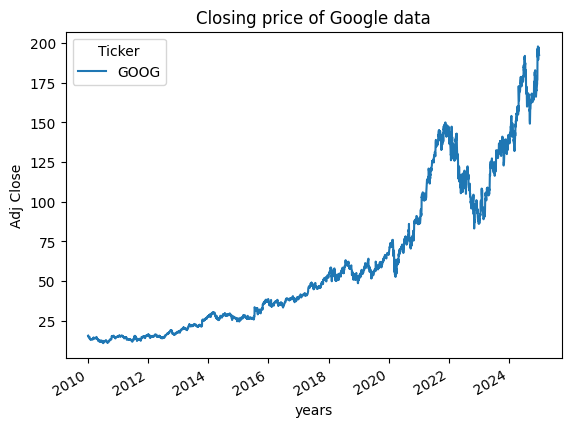

In [ ]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [ ]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [ ]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

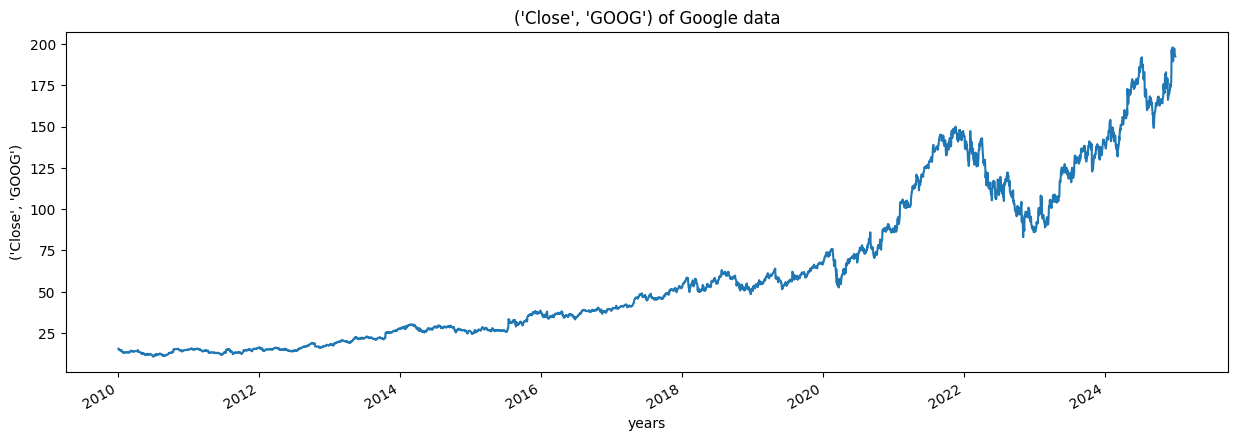

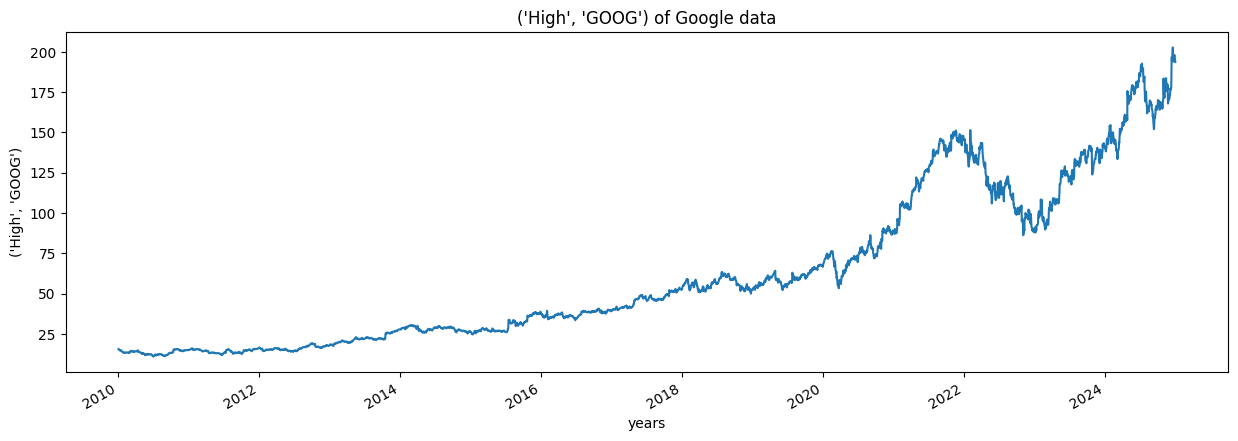

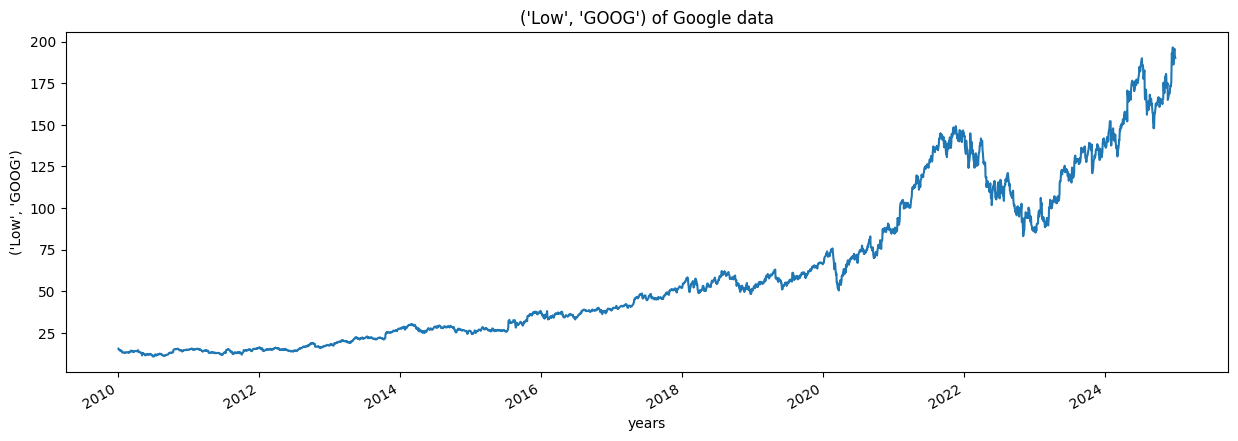

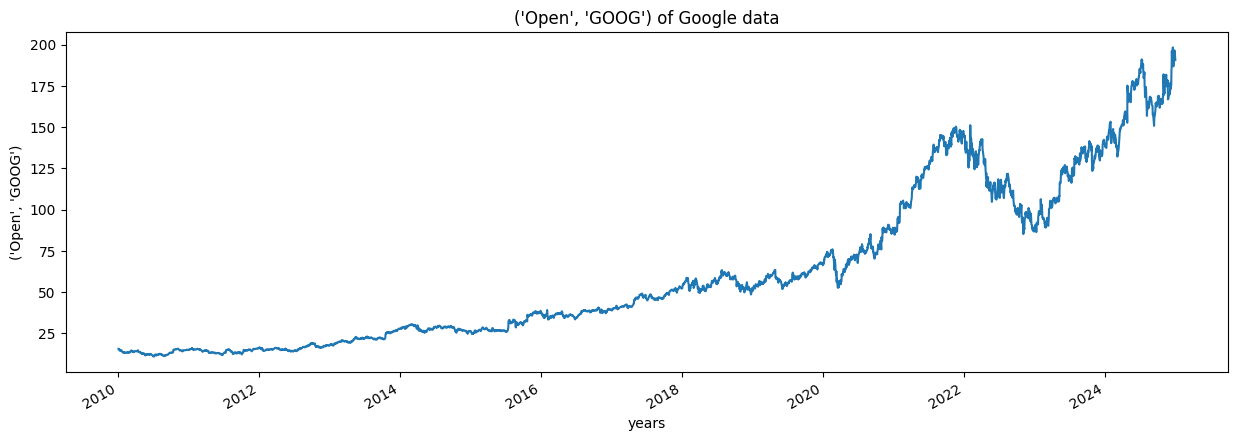

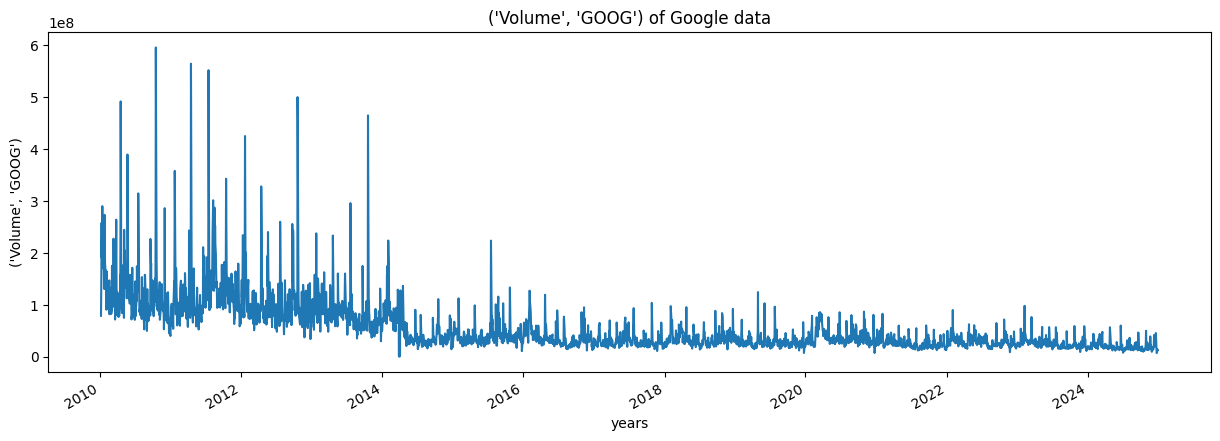

In [ ]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [ ]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [ ]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 251


In [ ]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2010-12-22,NaN
2010-12-23,NaN
2010-12-27,NaN
2010-12-28,NaN
2010-12-29,13.265629


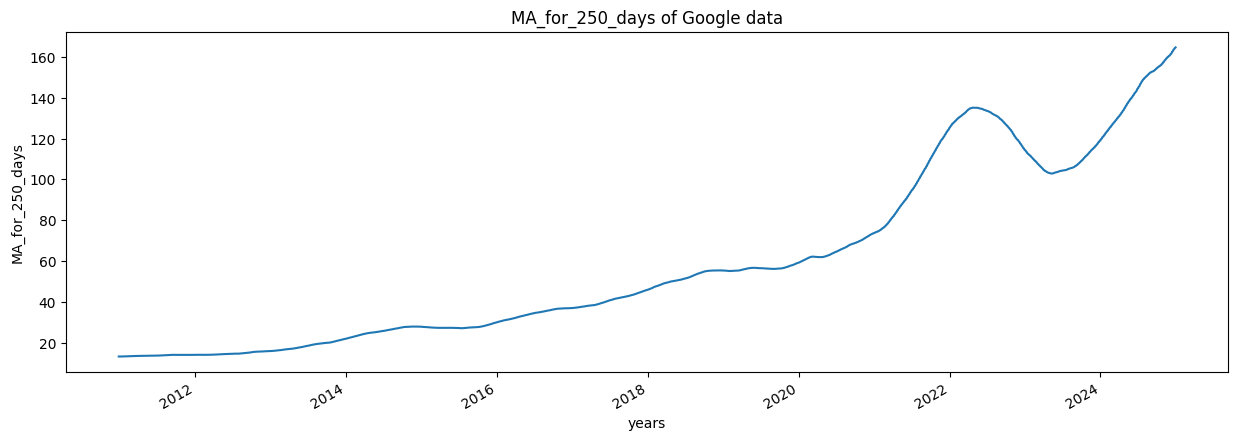

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

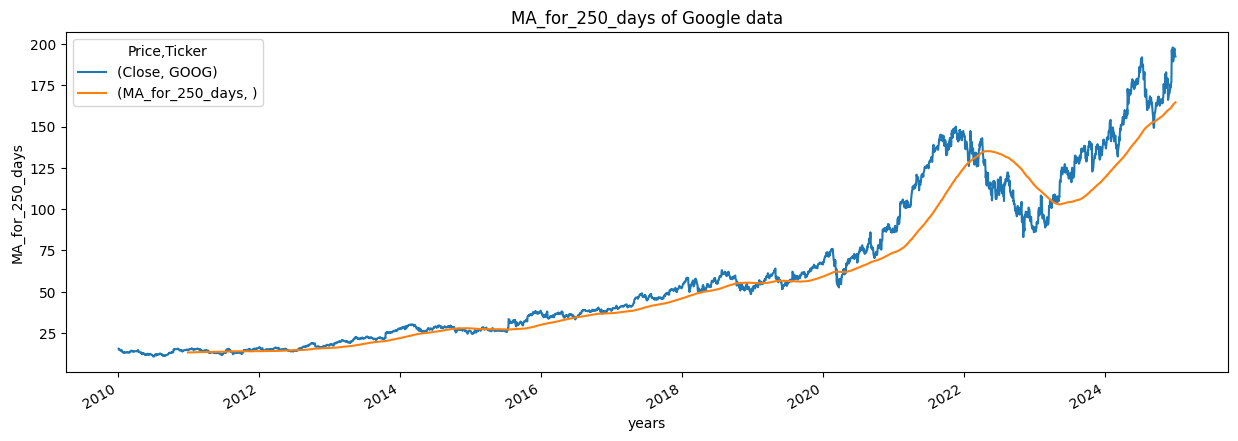

In [ ]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

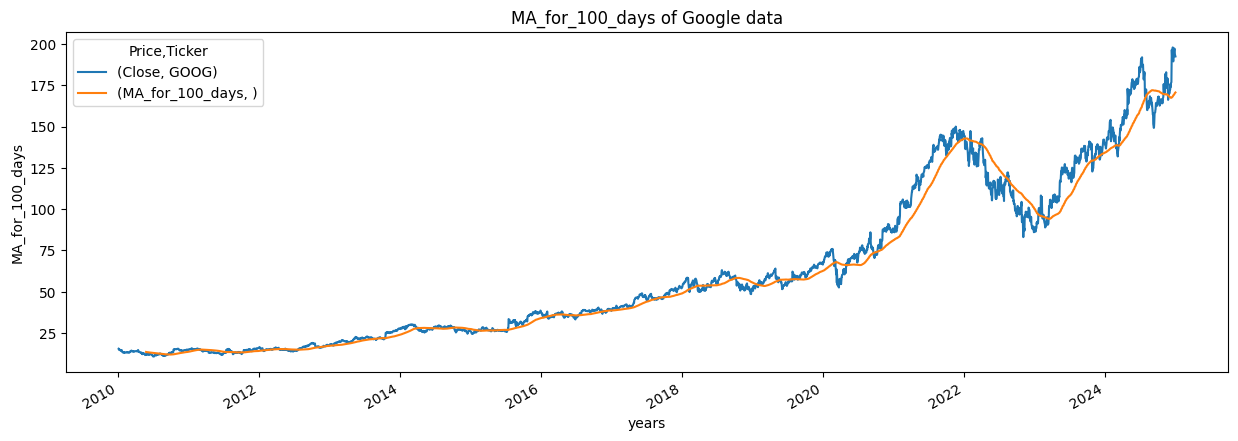

In [ ]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

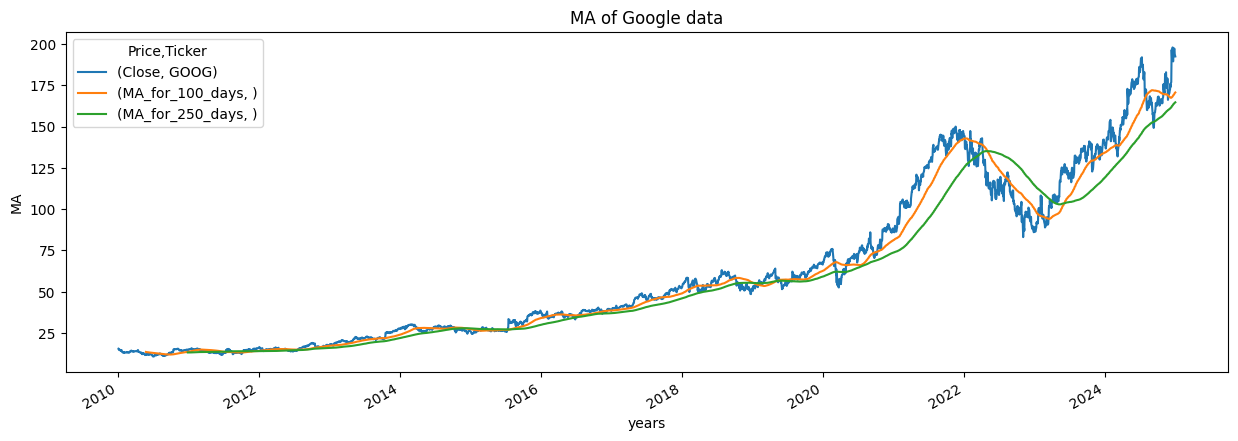

In [ ]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2010-01-04,15.536651,NaN
2010-01-05,15.468233,-0.004404
2010-01-06,15.078297,-0.025209
2010-01-07,14.727283,-0.023279
2010-01-08,14.923613,0.013331


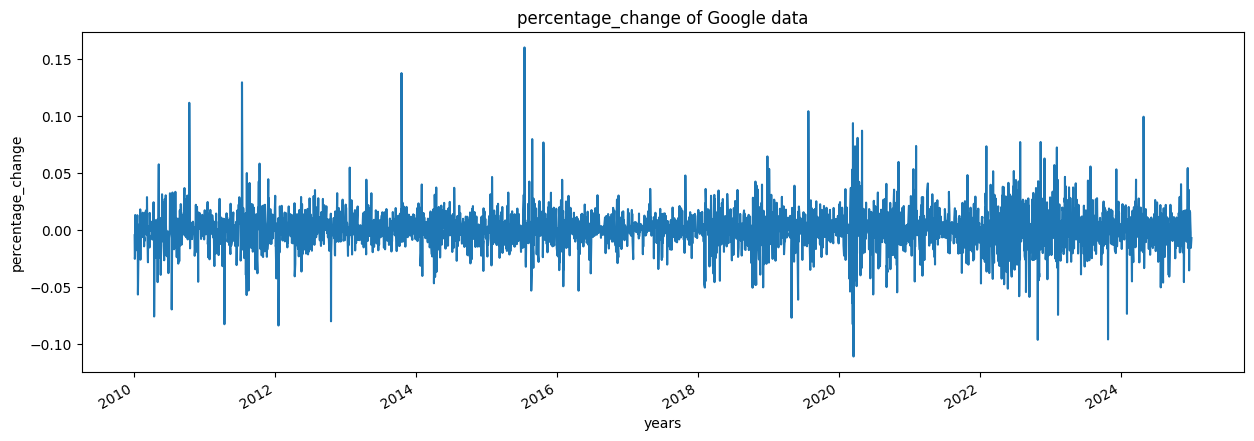

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = google_data[['Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([197.93450928]), array([10.80983925]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02526023],
       [0.0248946 ],
       [0.02281077],
       ...,
       [0.99434178],
       [0.97800757],
       [0.97080141]])

In [ ]:
len(scaled_data)

3773

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[0.02526023],
        [0.0248946 ],
        [0.02281077],
        [0.02093494],
        [0.02198413],
        [0.02186358],
        [0.02045538],
        [0.02000629],
        [0.02037192],
        [0.01906704],
        [0.0200765 ],
        [0.01912136],
        [0.01946181],
        [0.01509414],
        [0.01376807],
        [0.01408866],
        [0.01404627],
        [0.01301164],
        [0.01243537],
        [0.01284339],
        [0.0125917 ],
        [0.01387669],
        [0.01201676],
        [0.01261421],
        [0.01290301],
        [0.01329646],
        [0.01303284],
        [0.01329116],
        [0.01285664],
        [0.01394028],
        [0.01353095],
        [0.01419463],
        [0.01386875],
        [0.014139  ],
        [0.01311497],
        [0.01263806],
        [0.01197039],
        [0.01201941],
        [0.01279968],
        [0.01390849],
        [0.01447283],
        [0.01570087],
        [0.01697527],
        [0.01674609],
        [0.01644272],
        [0

In [ ]:

int(len(x_data)*0.7)

2571

In [ ]:
4908-100-int(len(x_data)*0.7)

2237

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2571, 100, 1)
(2571, 1)
(1102, 100, 1)
(1102, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 1)

2571/2571 ━━━━━━━━━━━━━━━━━━━━ 209s 79ms/step - loss: 4.7114e-04


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [ ]:
predictions

array([[0.33767703],
       [0.33924678],
       [0.34025902],
       ...,
       [0.92044604],
       [0.9253634 ],
       [0.9259511 ]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 73.99754],
       [ 74.29128],
       [ 74.4807 ],
       ...,
       [183.048  ],
       [183.96817],
       [184.07814]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 75.56459045],
       [ 75.03111267],
       [ 75.54119873],
       ...,
       [196.87571716],
       [193.81918335],
       [192.47073364]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

np.float64(5.573966612732673)

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-08-13,75.564590,73.997543
2020-08-14,75.031113,74.291283
2020-08-17,75.541199,74.480698
2020-08-18,77.562630,74.683571
2020-08-19,77.011734,75.221756


<Figure size 640x480 with 0 Axes>

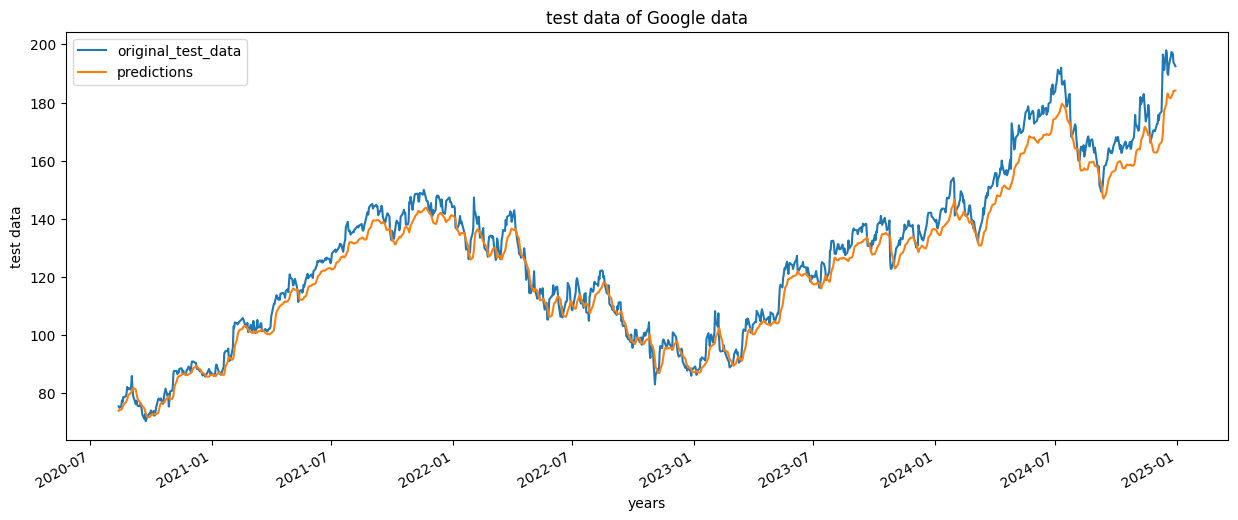

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

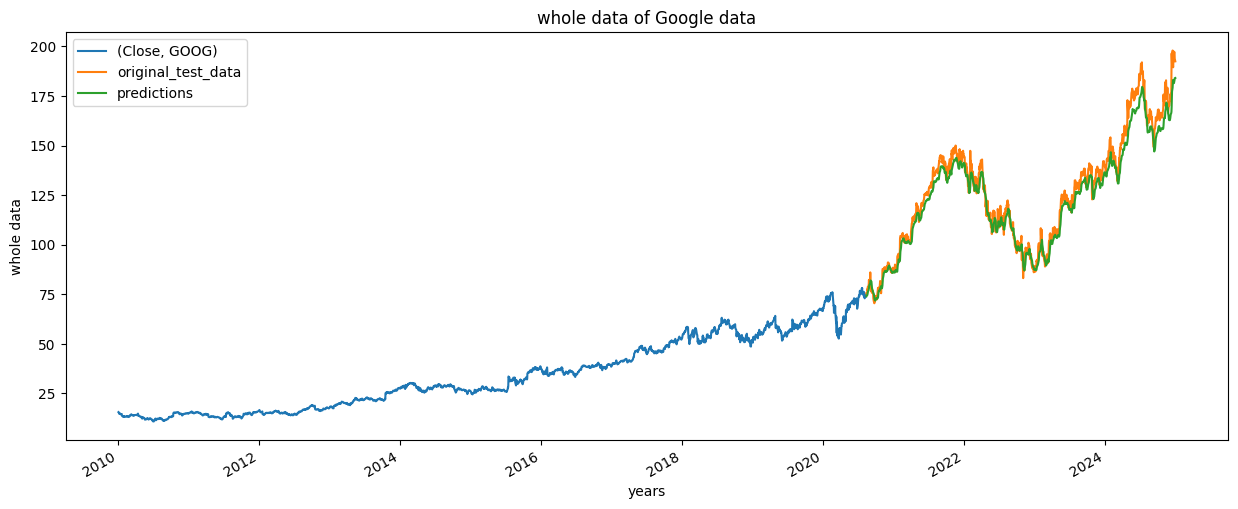

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")